# Volume Cropping Tool with Ink Labels

This tool helps you **crop a 3D volume along with its associated ink labels**.

## Workflow

### 1. Visualize
- Load the volume and its ink labels.  
- Inspect them to decide which region you want to crop.

### 2. Crop
- Specify the rectangle or region of interest (ROI).  
- Crop both the volume layers and the corresponding ink labels.

### 3. Save
- Save the cropped region.  
- Optionally, save the remaining part of the volume if you want to keep it for later use.

## Notes
- Ensure the ink labels align with the volume layers to maintain proper correspondence.  
- You can process a subset of layers by configuring the index range (e.g., layers 15–40).

## Example Usage

1. **Select Fragment**  
   Crop `frag1` from folder:  
   ```python
   FRAG_PATH = '../train_scrolls/frag1'
   RECT = (2000, 1400, 2400, 1400)

2. **Visualize**
    Open the images and check which part you want to crop.

3. **Pick Configuration**

    ```python
    RECT_OUT_NAME = 'rectfrag1'           # No underscores (_) recommended
    REMAINING_OUT_NAME = 'remainingfrag1' # No underscores (_) recommended
    start_idx, end_idx = 15, 40           # Select layers to process and save
    KEEP_REMAINING = True                 # Keep remaining part or not

4. **Crop**

5. **Check Results**

    Cropped rectangle images are saved in "../train_scrolls/rectfrag1/layers"

    Remaining images (`if KEEP_REMAINING=True`) are saved in "../train_scrolls/remainingfrag1/layers"


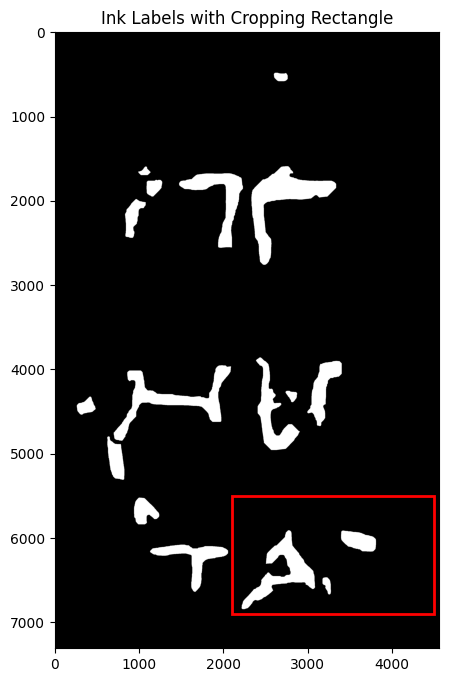

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/frag5'  # Path to fragment/Segment directory
RECT = (2100, 5500, 2400, 1400)        # (x, y, width, height)

# =================================
inklabel_path = None
for fname in os.listdir(FRAG_PATH):
    if 'inklabels' in fname.lower() and fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        inklabel_path = os.path.join(FRAG_PATH, fname)
        break
img = Image.open(inklabel_path)

# Plot the inklabels with rectangle
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img, cmap='gray')
x, y, w, h = RECT
rect_patch = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect_patch)
ax.set_title("Ink Labels with Cropping Rectangle")
plt.show()

In [18]:
from tqdm import tqdm
import numpy as np

# ==== CONFIGURABLE PART ====
RECT_OUT_NAME = 'rect5'      # No _ recommended
REMAINING_OUT_NAME = 'remaining5'  # No _ recommended
start_idx, end_idx = 5, 60      # Select layers to process and save
KEEP_REMAINING = True            # Keep remaining part or not
# RECT = (2000, 1400, 2400, 1400)  # Example rectangle (x, y, w, h)
# FRAG_PATH = '../train_scrolls/frag1'
# ============================

frag_name = os.path.basename(FRAG_PATH.rstrip('/'))
LAYER_DIR = os.path.join(FRAG_PATH, 'layers')

RECT_OUT = os.path.join("../train_scrolls", RECT_OUT_NAME)
REMAINING_OUT = os.path.join("../train_scrolls", REMAINING_OUT_NAME)

RECT_LAYER_OUT = os.path.join(RECT_OUT, 'layers')
REMAINING_LAYER_OUT = os.path.join(REMAINING_OUT, 'layers')

# Create necessary directories
os.makedirs(RECT_LAYER_OUT, exist_ok=True)
if KEEP_REMAINING:
    os.makedirs(REMAINING_LAYER_OUT, exist_ok=True)

def split_image(img_path, rect, out_name,rem_outname, out_subdir=None, keep_remaining=True):
    x, y, w, h = rect
    img = Image.open(img_path)

    if img.mode in ["RGBA", "RGB"]:
        img = img.convert("L")

    # Crop rectangle
    rect_crop = img.crop((x, y, x + w, y + h))
    rect_crop.save(os.path.join(out_subdir[0], out_name))

    # REMAINING (if desired)
    if keep_remaining:
        img_array = np.array(img)
        img_array[y:y+h, x:x+w] = 0  # Zero out cropped region
        if img_array.max() <= 1:
            img_array = (img_array * 255)
        # img_remain = Image.fromarray(img_array)
        img_remain = Image.fromarray(img_array.astype("uint8"))
        
        img_remain.save(os.path.join(out_subdir[1], rem_outname))

def numerical_sort(fname):
    name, _ = os.path.splitext(fname)
    return int(name)

# List and sort layer files numerically
layer_files = [f for f in os.listdir(LAYER_DIR) if f.lower().endswith(('.tiff', '.tif', '.png', '.jpg', '.jpeg'))]
layer_files = sorted(layer_files, key=numerical_sort)
layer_files = layer_files[start_idx:end_idx+1]

# Process selected layers
for fname in tqdm(layer_files):
    fpath = os.path.join(LAYER_DIR, fname)
    split_image(fpath, RECT, fname, fname, (RECT_LAYER_OUT, REMAINING_LAYER_OUT), keep_remaining=KEEP_REMAINING)

# Process inklabels and mask
for suffix in ['mask.png', 'inklabels.png']:
    fname = f"{frag_name}_{suffix}"
    fpath = os.path.join(FRAG_PATH, fname)
    if os.path.exists(fpath):
        rect_outname = f"{os.path.basename(RECT_OUT)}_{suffix}"
        rem_outname = f"{os.path.basename(REMAINING_OUT)}_{suffix}"
        split_image(fpath, RECT, rect_outname, rem_outname, (RECT_OUT, REMAINING_OUT), keep_remaining=KEEP_REMAINING)

print(f"Cropping complete for {frag_name}.")

100%|██████████| 56/56 [01:23<00:00,  1.49s/it]


Cropping complete for frag5.


In [ ]:
# import os
# from tqdm import tqdm
# import numpy as np
# from PIL import Image

# # ==== CONFIGURABLE PART ======================================================
# RECT_OUT_NAME = 'rect5'              # Output folder for cropped region
# REMAINING_OUT_NAME = 'remaining5'    # Output folder for remaining region
# start_idx, end_idx = 15, 45          # Layers to process
# KEEP_REMAINING = True                # Save remaining or not
# # RECT = (2000, 1400, 2400, 1400)    # (x, y, w, h)
# # FRAG_PATH = '../train_scrolls/frag1'
# # ============================================================================

# frag_name = os.path.basename(FRAG_PATH.rstrip('/'))
# LAYER_DIR = os.path.join(FRAG_PATH, 'layers')

# RECT_OUT = os.path.join("../train_scrolls", RECT_OUT_NAME)
# REMAINING_OUT = os.path.join("../train_scrolls", REMAINING_OUT_NAME)

# RECT_LAYER_OUT = os.path.join(RECT_OUT, 'layers')
# REMAINING_LAYER_OUT = os.path.join(REMAINING_OUT, 'layers')

# os.makedirs(RECT_LAYER_OUT, exist_ok=True)
# if KEEP_REMAINING:
#     os.makedirs(REMAINING_LAYER_OUT, exist_ok=True)


# # ============================================================================
# #   MAIN FUNCTION — CROP + REMAINING + RESIZE EVERYTHING TO ORIGINAL TIF SIZE
# # ============================================================================
# def split_image(img_path, rect, out_name, out_subdir=None, keep_remaining=True):

#     x, y, w, h = rect

#     # --- load ---
#     img = Image.open(img_path)

#     # original tif size
#     orig_w, orig_h = img.size

#     # convert RGB → grayscale
#     if img.mode in ["RGBA", "RGB"]:
#         img = img.convert("L")

#     # =======================
#     #       CROP
#     # =======================
#     rect_crop = img.crop((x, y, x + w, y + h))

#     # resize crop to tif size
#     rect_resized = rect_crop.resize((orig_w, orig_h), Image.BILINEAR)

#     rect_resized.save(os.path.join(out_subdir[0], out_name))

#     # =======================
#     #     REMAINING REGION
#     # =======================
#     if keep_remaining:

#         arr = np.array(img)           # uint8 / uint16 preserved
#         arr[y:y+h, x:x+w] = 0         # zero rectangle

#         remain_img = Image.fromarray(arr)

#         # resize to tif size
#         remain_img = remain_img.resize((orig_w, orig_h), Image.BILINEAR)

#         remain_img.save(os.path.join(out_subdir[1], out_name))


# # sort numeric filenames
# def numerical_sort(fname):
#     name, _ = os.path.splitext(fname)
#     return int(name)


# # ============================================================================
# #                 PROCESS NORMAL LAYERS
# # ============================================================================
# layer_files = [
#     f for f in os.listdir(LAYER_DIR)
#     if f.lower().endswith(('.tiff', '.tif', '.png', '.jpg', '.jpeg'))
# ]

# layer_files = sorted(layer_files, key=numerical_sort)
# layer_files = layer_files[start_idx:end_idx+1]

# for fname in tqdm(layer_files):
#     fpath = os.path.join(LAYER_DIR, fname)
#     split_image(fpath, RECT, fname,
#                 (RECT_LAYER_OUT, REMAINING_LAYER_OUT),
#                 keep_remaining=KEEP_REMAINING)

# # ============================================================================
# #                 PROCESS mask.png + inklabels.png
# # ============================================================================
# for suffix in ['mask.png', 'inklabels.png']:
#     fname = f"{frag_name}_{suffix}"
#     fpath = os.path.join(FRAG_PATH, fname)

#     if os.path.exists(fpath):

#         rect_outname = f"{RECT_OUT_NAME}_{suffix}"
#         rem_outname = f"{REMAINING_OUT_NAME}_{suffix}"

#         split_image(fpath, RECT,
#                     rect_outname,
#                     (RECT_OUT, REMAINING_OUT),
#                     keep_remaining=KEEP_REMAINING)

# print(f"Cropping complete for {frag_name}.")

100%|██████████| 31/31 [00:30<00:00,  1.01it/s]


Cropping complete for frag5.


# METRICS


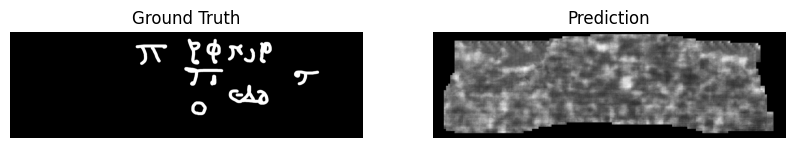

{'Error': "Target is multiclass but average='binary'. Please choose another "
          "average setting, one of [None, 'micro', 'macro', 'weighted']."}


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, precision_score, recall_score

def resize_image(image, target_shape):
    return cv2.resize(image, (target_shape[1], target_shape[0]), interpolation=cv2.INTER_NEAREST)

def compute_metrics(result_path, ground_truth_path, threshold=0.5):
    # Load images in grayscale
    result = cv2.imread(result_path, cv2.IMREAD_GRAYSCALE)
    ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize ground truth to match result
    ground_truth = resize_image(ground_truth, result.shape)
    try:
        # Normalize to binary using a variable threshold (0 to 1 range)
        threshold_value = int(threshold * 255)
        # result = (result > threshold_value).astype(np.uint8)
        ground_truth = (ground_truth > threshold_value).astype(np.uint8)
        
        # Compute pixel accuracy
        pixel_accuracy = accuracy_score(ground_truth.flatten(), result.flatten())
        
        # Compute precision and recall
        precision = precision_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        recall = recall_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        
        # Compute IoU
        intersection = np.logical_and(result, ground_truth).sum()
        union = np.logical_or(result, ground_truth).sum()
        iou = intersection / union if union != 0 else 0
        
        # Compute Dice coefficient (F1-score for segmentation)
        dice = (2 * intersection) / (result.sum() + ground_truth.sum()) if (result.sum() + ground_truth.sum()) != 0 else 0
        
        # Compute AUPRC
        precision_curve, recall_curve, _ = precision_recall_curve(ground_truth.flatten(), result.flatten())
        auprc = auc(recall_curve, precision_curve)
        
        metrics = {
            "Pixel Accuracy": pixel_accuracy,
            "Precision": precision,
            "Recall": recall,
            "IoU": iou,
            "Dice Coefficient": dice,
            "AUPRC": auprc
        }
    except Exception as e:
        metrics = {
            "Error": str(e)
        }
    
    # Display images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(ground_truth, cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title("Prediction")
    plt.axis("off")
    
    plt.show()
    
    return metrics

# Example usage
result_path = "../wandb/run-20250730_235123-0du3ircv/files/media/images/masks_72_53dfea2d9e0ad85f9c16.png"
ground_truth_path = "../train_scrolls/20231215151901/20231215151901_inklabels.png"
threshold = 0.6 # Adjustable threshold between 0 and 1
metrics = compute_metrics(result_path, ground_truth_path, threshold)
pprint(metrics)

# MATCH HISTOGRAMS

In [ ]:
import numpy as np
import tifffile
from skimage.exposure import match_histograms
import os

# Load 3D volume from TIFF stack
def load_tiff_stack(folder_path):
    # Assuming folder_path contains slices named in order or just one multi-page TIFF
    # If multi-page TIFF:
    volume = tifffile.imread(folder_path)
    return volume

# Save 3D volume as TIFF stack (multi-page TIFF)
def save_tiff_stack(volume, out_path):
    tifffile.imwrite(out_path, volume.astype(np.uint16))  # change dtype as needed

# Match histogram for the whole 3D volume
def match_3d_histogram(source, reference):
    matched = match_histograms(source, reference, channel_axis=None)
    return matched

# Paths to your TIFF stacks (multi-page TIFF files or folders with slices)
ref_tiff_path = './train_scrolls/frag5/layers/30.tif'
src_tiff_path = './train_scrolls/frag1/layers/30.tif'
out_tiff_path = 'matched_54kv_to_73kv.tif'

# Load volumes
ref_volume = load_tiff_stack(ref_tiff_path)
src_volume = load_tiff_stack(src_tiff_path)

# Check shapes are the same or resize if necessary
print(f'Reference volume shape: {ref_volume.shape}')
print(f'Source volume shape: {src_volume.shape}')

# If shapes differ, you might want to resize source to ref or vice versa before matching

# Match histograms
matched_volume = match_3d_histogram(src_volume, ref_volume)

# Save matched volume
save_tiff_stack(matched_volume, out_tiff_path)

print(f'Matched volume saved to {out_tiff_path}')


Reference volume shape: (7309, 4560)
Source volume shape: (8181, 6330)
Matched volume saved to matched_54kv_to_73kv.tif


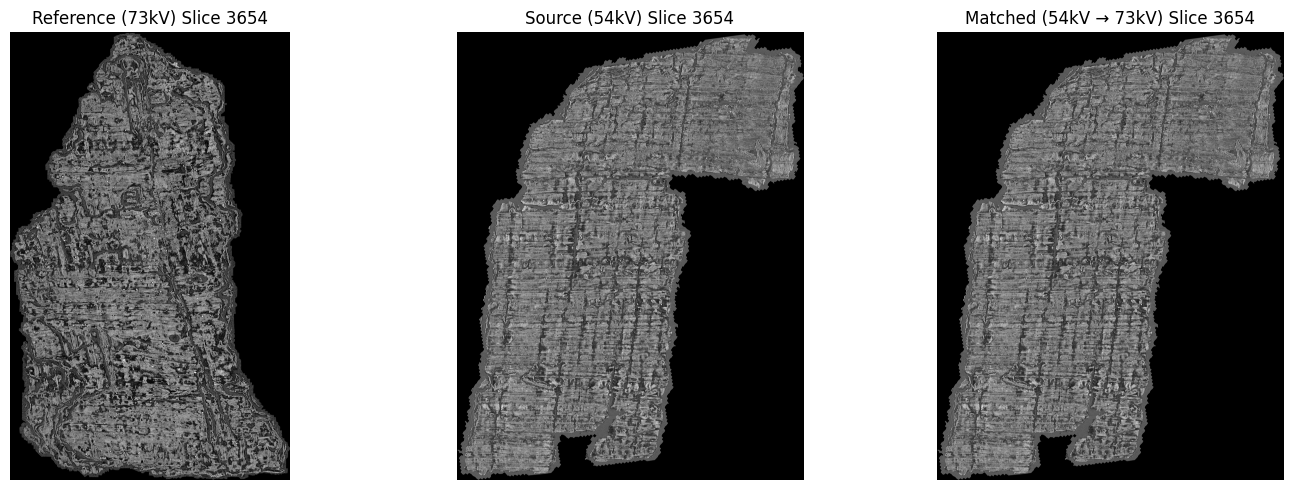

In [ ]:
import matplotlib.pyplot as plt

def plot_slices_side_by_side(ref_vol, src_vol, matched_vol, slice_idx=None):
    # If no slice index specified, use the middle slice
    if slice_idx is None:
        slice_idx = ref_vol.shape[0] // 2
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot reference slice
    axes[0].imshow(ref_vol, cmap='gray')
    axes[0].set_title(f'Reference (73kV) Slice {slice_idx}')
    axes[0].axis('off')
    
    # Plot source slice
    axes[1].imshow(src_vol, cmap='gray')
    axes[1].set_title(f'Source (54kV) Slice {slice_idx}')
    axes[1].axis('off')
    
    # Plot matched slice
    axes[2].imshow(matched_vol, cmap='gray')
    axes[2].set_title(f'Matched (54kV → 73kV) Slice {slice_idx}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_slices_side_by_side(ref_volume, src_volume, matched_volume)


In [ ]:
import numpy as np
import tifffile
from skimage.exposure import match_histograms
import os

# Load all TIFF slices from a folder into a 3D numpy array
def load_tiff_folder(folder_path):
    # List all TIFF files, sorted by filename (assumes correct slice order)
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')])
    volume_slices = []
    for f in files:
        slice_img = tifffile.imread(os.path.join(folder_path, f))
        volume_slices.append(slice_img)
    volume = np.stack(volume_slices, axis=0)
    return volume, files  # returning filenames to reuse for saving

# Save 3D numpy array as individual TIFF slices in output folder
def save_tiff_folder(volume, filenames, out_folder):
    os.makedirs(out_folder, exist_ok=True)
    for i, filename in enumerate(filenames):
        out_path = os.path.join(out_folder, filename)
        tifffile.imwrite(out_path, volume[i].astype(np.uint16))  # adjust dtype if needed

# Histogram match slice-by-slice
def match_histograms_slicewise(src_vol, ref_vol):
    matched_slices = []
    for i in range(src_vol.shape[0]):
        matched = match_histograms(src_vol[i], ref_vol[i], channel_axis=None)
        matched_slices.append(matched)
    matched_volume = np.stack(matched_slices, axis=0)
    return matched_volume

# Paths to folders containing TIFF slices
ref_folder = './train_scrolls/frag1/layers/'
src_folder = './train_scrolls/frag5/layers/'
out_folder = './matched_54kv_to_73kv_slices'

# Load volumes and get filenames
ref_volume, ref_files = load_tiff_folder(ref_folder)
src_volume, src_files = load_tiff_folder(src_folder)

# Sanity check: number of slices and file names should match
# assert ref_volume.shape == src_volume.shape, "Source and Reference volumes must have the same shape!"
assert ref_files == src_files, "Filenames in source and reference folders should match and be in the same order!"

print(f'Volume shape: {ref_volume.shape}')
print(f'Number of slices: {len(ref_files)}')

# Match histograms slice-by-slice
matched_volume = match_histograms_slicewise(src_volume, ref_volume)

# Save matched slices
save_tiff_folder(matched_volume, src_files, out_folder)

print(f'Matched slices saved to folder: {out_folder}')


Volume shape: (65, 8181, 6330)
Number of slices: 65
Matched slices saved to folder: ./matched_54kv_to_73kv_slices


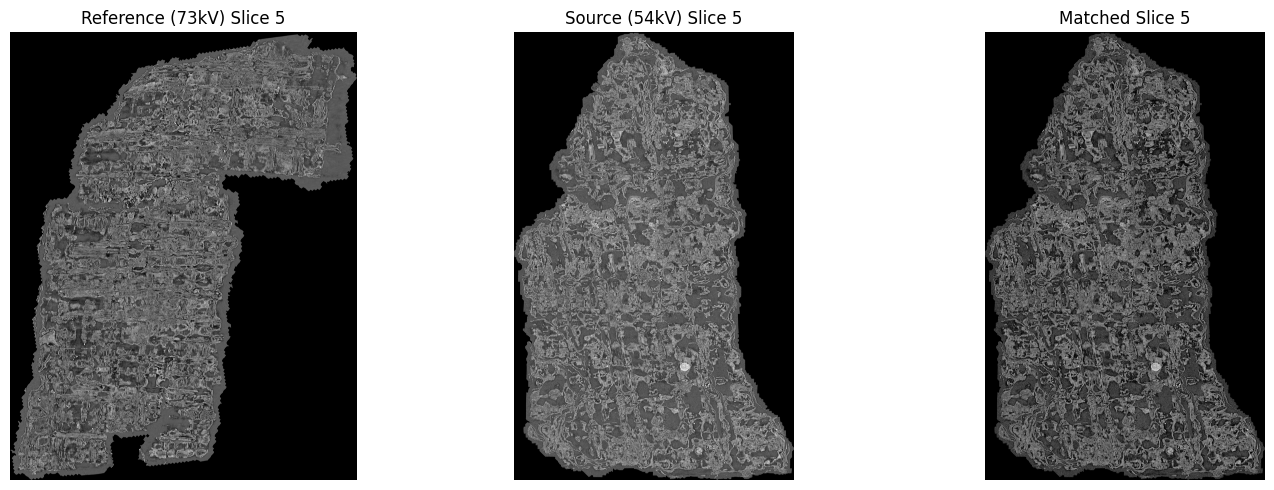

In [ ]:
import matplotlib.pyplot as plt
import tifffile

# Load volumes (assuming multi-page TIFF or stacks already loaded)
ref_folder = './train_scrolls/frag1/layers'
src_folder = './train_scrolls/frag5/layers'
matched_folder = './matched_54kv_to_73kv_slices'

def load_tiff_slice(folder_path, slice_idx=0):
    # Load the slice-th TIFF file (assuming sorted filenames)
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')])
    slice_img = tifffile.imread(os.path.join(folder_path, files[slice_idx]))
    return slice_img

slice_idx = 5  # change this index to view other slices

# Load slices
ref_slice = load_tiff_slice(ref_folder, slice_idx)
src_slice = load_tiff_slice(src_folder, slice_idx)
matched_slice = load_tiff_slice(matched_folder, slice_idx)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ref_slice, cmap='gray')
axes[0].set_title(f'Reference (73kV) Slice {slice_idx}')
axes[0].axis('off')

axes[1].imshow(src_slice, cmap='gray')
axes[1].set_title(f'Source (54kV) Slice {slice_idx}')
axes[1].axis('off')

axes[2].imshow(matched_slice, cmap='gray')
axes[2].set_title(f'Matched Slice {slice_idx}')
axes[2].axis('off')

plt.tight_layout()
plt.show()